## Initial Setup and EDA 

In [10]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# 2. Load Data
df = pd.read_csv('Churn_Modelling.csv')
print(f"Dataset shape: {df.shape}")
print(df.head())

# 3. Initial Exploration
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:", df.isnull().sum().sum())
print("\nChurn Rate:", df['Exited'].value_counts(normalize=True))

# 4. Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

## Deep EDA and Insight

NameError: name 'df' is not defined

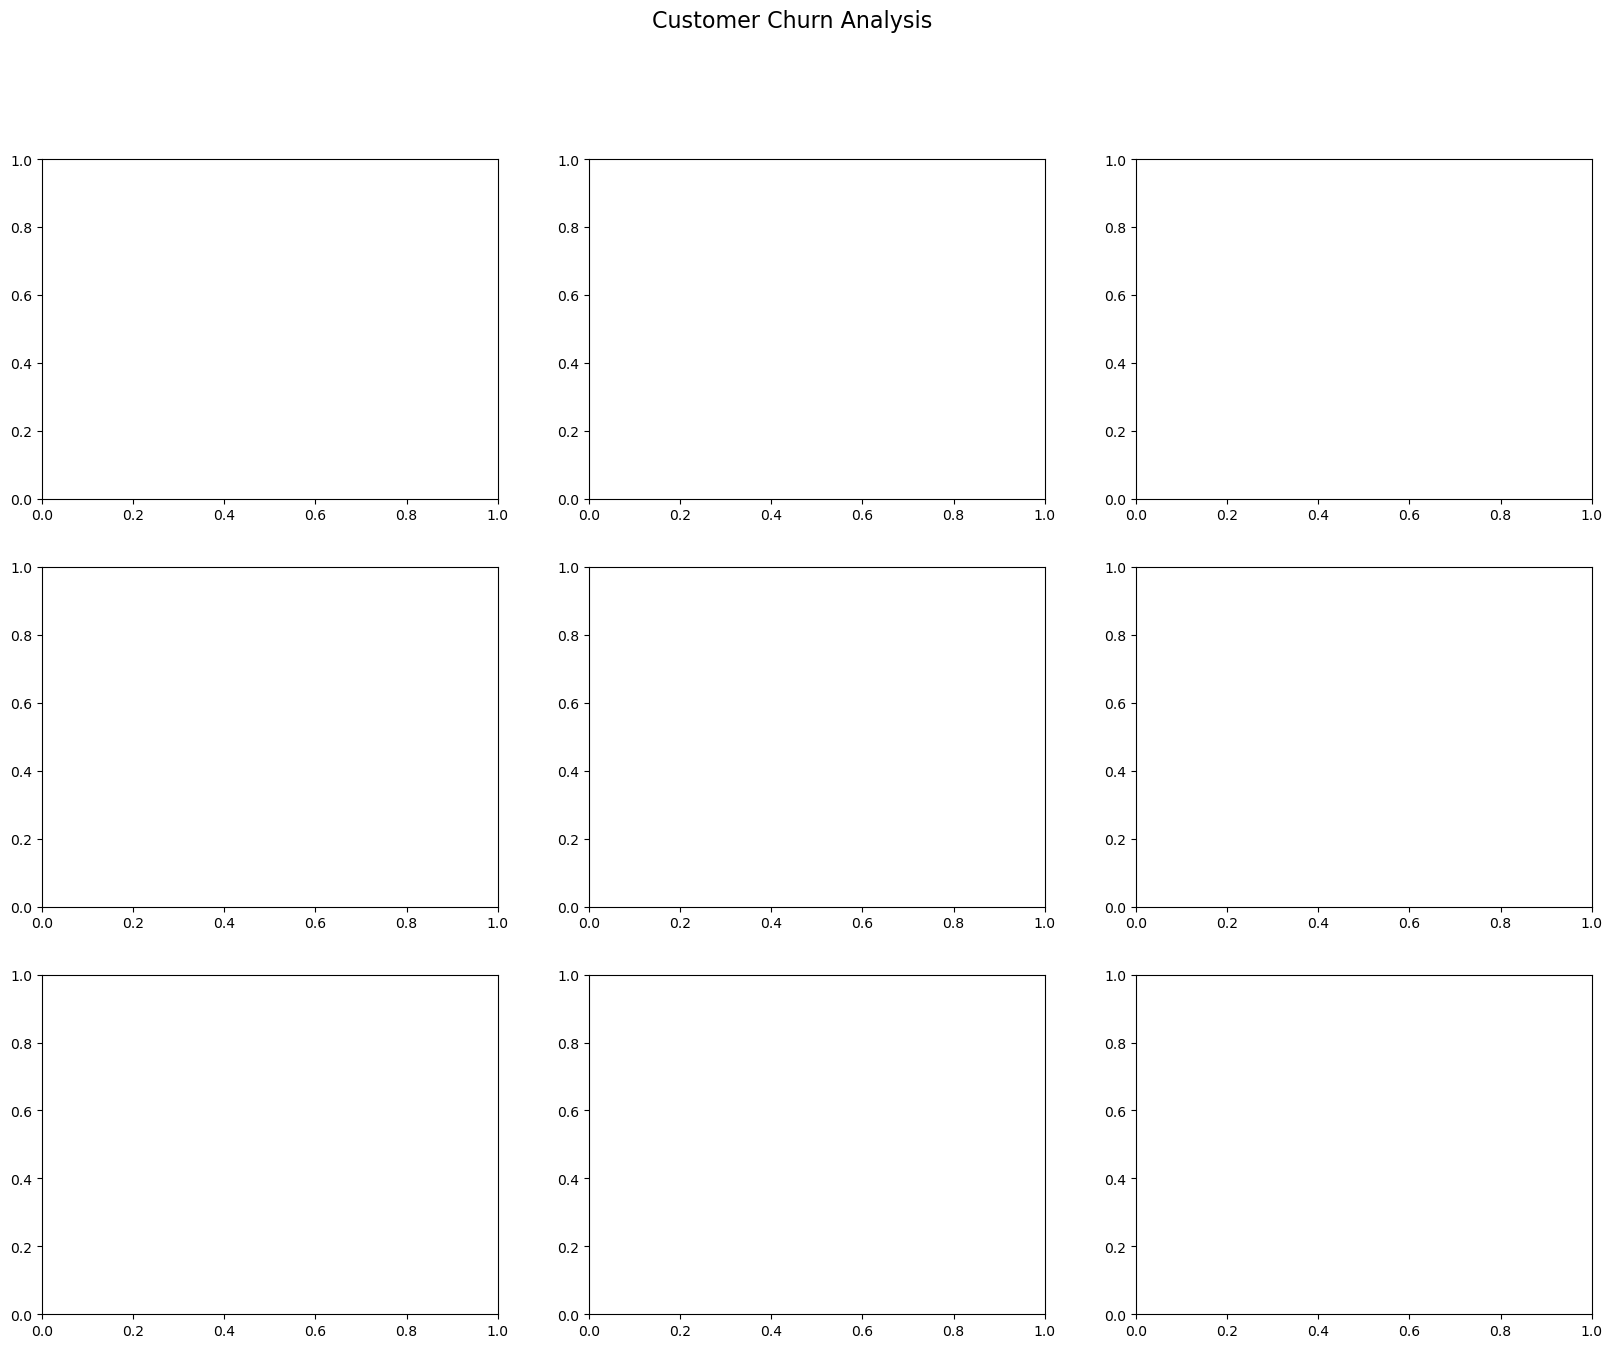

In [4]:
# Create visualization dashboard
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Customer Churn Analysis', fontsize=16)

# 1. Churn by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], 
                        labels=['<30', '30-40', '40-50', '50-60', '60+'])
churn_by_age = df.groupby('AgeGroup')['Exited'].mean()
churn_by_age.plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Churn Rate by Age Group')
axes[0,0].set_ylabel('Churn Rate')

# 2. Churn by Geography
churn_by_geo = df.groupby('Geography')['Exited'].mean()
churn_by_geo.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Churn Rate by Country')

# 3. Churn by Number of Products
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean()
churn_by_products.plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Churn Rate by Products Owned')

# 4. Balance Distribution
axes[1,0].hist([df[df['Exited']==0]['Balance'], df[df['Exited']==1]['Balance']], 
               label=['Stayed', 'Churned'], bins=30, alpha=0.7)
axes[1,0].set_title('Balance Distribution by Churn')
axes[1,0].legend()

# 5. Churn by Activity Status
activity_churn = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')
activity_churn.plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Activity Status vs Churn')

# 6. Credit Score Analysis
axes[1,2].boxplot([df[df['Exited']==0]['CreditScore'], 
                   df[df['Exited']==1]['CreditScore']], 
                  labels=['Stayed', 'Churned'])
axes[1,2].set_title('Credit Score Distribution')

# 7. Tenure Analysis
tenure_churn = df.groupby('Tenure')['Exited'].mean()
tenure_churn.plot(ax=axes[2,0])
axes[2,0].set_title('Churn Rate by Years with Bank')
axes[2,0].set_xlabel('Tenure (Years)')

# 8. Gender Analysis
gender_churn = df.groupby('Gender')['Exited'].mean()
gender_churn.plot(kind='bar', ax=axes[2,1], color='purple')
axes[2,1].set_title('Churn Rate by Gender')

# 9. Correlation Heatmap
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', ax=axes[2,2], cmap='coolwarm')
axes[2,2].set_title('Feature Correlations')

plt.tight_layout()
plt.show()